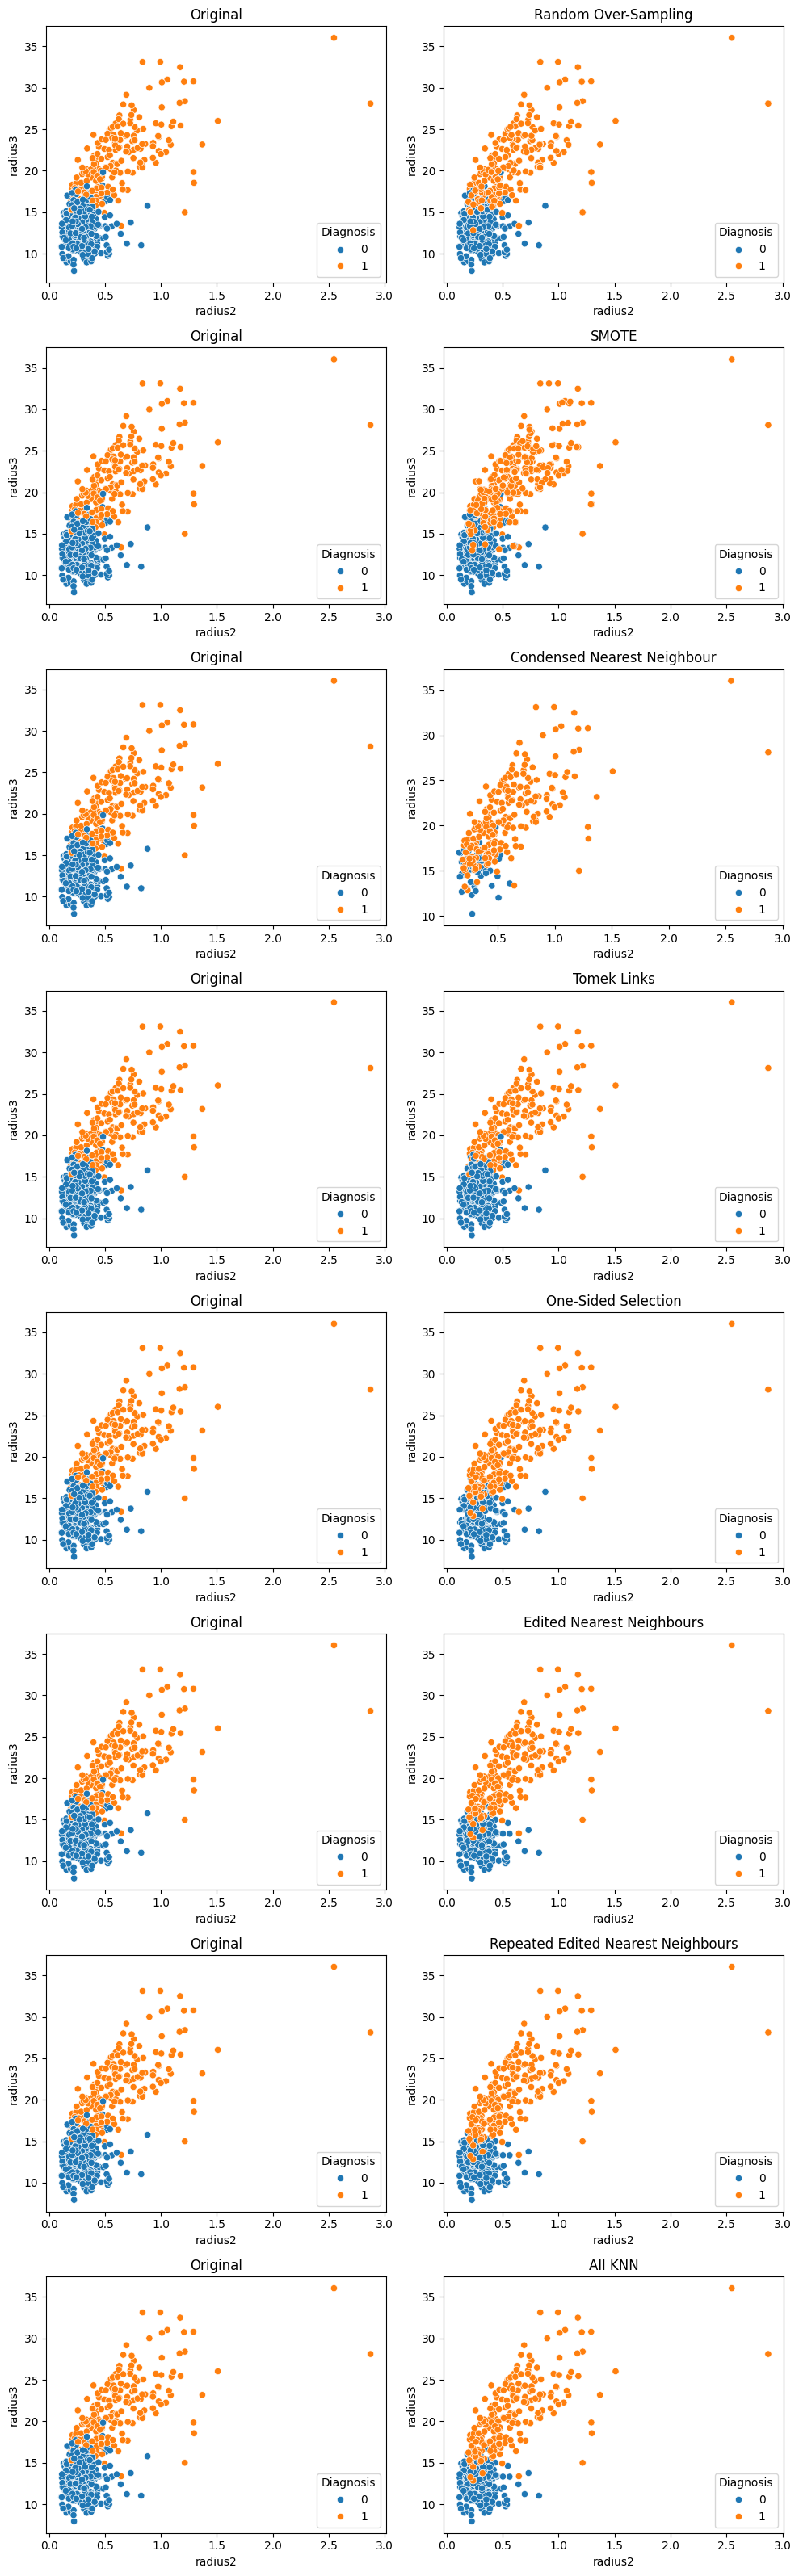

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train = pd.read_csv('./dataset.csv')

x_train = train.drop(['diagnosis'], axis=1)
y_train = train['diagnosis']
col_names = x_train.columns

# print(y_train)

# turn into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


# Citation for the sampling: https://imbalanced-learn.org/stable/user_guide.html

# Oversampling 1: Random Over-Sampling
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

ros_data = pd.DataFrame(x_resampled, columns=col_names)
ros_data['diagnosis'] = y_resampled

# OVersampling 2: SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

smote_data = pd.DataFrame(x_resampled, columns=col_names)
smote_data['diagnosis'] = y_resampled

# Undersampling 1: Condensed Nearest Neighbour
cnn = CondensedNearestNeighbour(random_state=42)
x_resampled, y_resampled = cnn.fit_resample(x_train, y_train)

cnn_data = pd.DataFrame(x_resampled, columns=col_names)
cnn_data['diagnosis'] = y_resampled

# Undersampling 2: Tomek Links
tl = TomekLinks()
x_resampled, y_resampled = tl.fit_resample(x_train, y_train)

tl_data = pd.DataFrame(x_resampled, columns=col_names)
tl_data['diagnosis'] = y_resampled

# Undersampling 3: One-Sided Selection
oss = OneSidedSelection(random_state=42)
x_resampled, y_resampled = oss.fit_resample(x_train, y_train)

oss_data = pd.DataFrame(x_resampled, columns=col_names)
oss_data['diagnosis'] = y_resampled

# Undersampling 4: Edited Nearest Neighbours
enn = EditedNearestNeighbours()
x_resampled, y_resampled = enn.fit_resample(x_train, y_train)

enn_data = pd.DataFrame(x_resampled, columns=col_names)
enn_data['diagnosis'] = y_resampled

# Undersampling 5: Repeated Edited Nearest Neighbours
renn = RepeatedEditedNearestNeighbours()
x_resampled, y_resampled = renn.fit_resample(x_train, y_train)

renn_data = pd.DataFrame(x_resampled, columns=col_names)
renn_data['diagnosis'] = y_resampled

# Undersampling 6: All KNN
allknn = AllKNN()
x_resampled, y_resampled = allknn.fit_resample(x_train, y_train)

allknn_data = pd.DataFrame(x_resampled, columns=col_names)
allknn_data['diagnosis'] = y_resampled


# Citation for the plotting: https://seaborn.pydata.org/tutorial/function_overview.html
# https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot

# Plotting original and technique (seaborn)
#f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
f, axs = plt.subplots(8, 2, figsize=(10, 32), gridspec_kw=dict(width_ratios=[4, 4]))

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[0, 0])
sns.scatterplot(data=ros_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[0, 1])
axs[0, 0].set_title('Original')
axs[0, 1].set_title('Random Over-Sampling')
axs[0, 0].legend(title='Diagnosis', loc='lower right')
axs[0, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[1, 0])
sns.scatterplot(data=smote_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[1, 1])
axs[1, 0].set_title('Original')
axs[1, 1].set_title('SMOTE')
axs[1, 0].legend(title='Diagnosis', loc='lower right')
axs[1, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[2, 0])
sns.scatterplot(data=cnn_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[2, 1])
axs[2, 0].set_title('Original')
axs[2, 1].set_title('Condensed Nearest Neighbour')
axs[2, 0].legend(title='Diagnosis', loc='lower right')
axs[2, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[3, 0])
sns.scatterplot(data=tl_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[3, 1])
axs[3, 0].set_title('Original')
axs[3, 1].set_title('Tomek Links')
axs[3, 0].legend(title='Diagnosis', loc='lower right')
axs[3, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[4, 0])
sns.scatterplot(data=oss_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[4, 1])
axs[4, 0].set_title('Original')
axs[4, 1].set_title('One-Sided Selection')
axs[4, 0].legend(title='Diagnosis', loc='lower right')
axs[4, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[5, 0])
sns.scatterplot(data=enn_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[5, 1])
axs[5, 0].set_title('Original')
axs[5, 1].set_title('Edited Nearest Neighbours')
axs[5, 0].legend(title='Diagnosis', loc='lower right')
axs[5, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[6, 0])
sns.scatterplot(data=renn_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[6, 1])
axs[6, 0].set_title('Original')
axs[6, 1].set_title('Repeated Edited Nearest Neighbours')
axs[6, 0].legend(title='Diagnosis', loc='lower right')
axs[6, 1].legend(title='Diagnosis', loc='lower right')

sns.scatterplot(data=train, x="radius2", y="radius3", hue="diagnosis", ax=axs[7, 0])
sns.scatterplot(data=allknn_data, x="radius2", y="radius3", hue="diagnosis", ax=axs[7, 1])
axs[7, 0].set_title('Original')
axs[7, 1].set_title('All KNN')
axs[7, 0].legend(title='Diagnosis', loc='lower right')
axs[7, 1].legend(title='Diagnosis', loc='lower right')


f.tight_layout()
plt.show()




